<a href="https://colab.research.google.com/github/Abhi08ch/CodVeda-Technologies/blob/main/L2_Task_2_Decision_Trees_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL-2**

# **Task 2: Decision Trees for Classification**

In [ ]:
# 1. Import all required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load the dataset
df = pd.read_csv("/content/1) iris.csv")
print(df.head())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# 3. Encode the target variable if it's not numeric
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

x = df.iloc[:, :-2]
y = df['species_encoded']

In [ ]:
# 4. Split Data into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 5. Train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

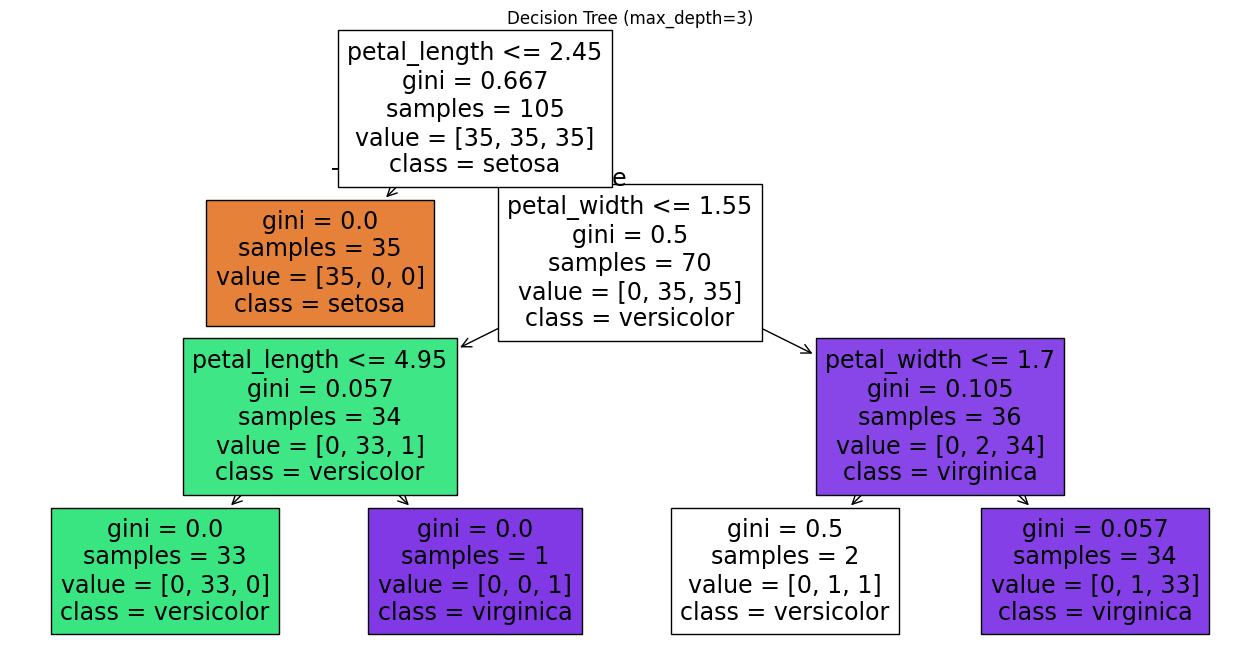

In [ ]:
# 6. Visualize the Decision Tree
plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=x.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

Accuracy: 0.98
F1 score: 0.98
Classififcation report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



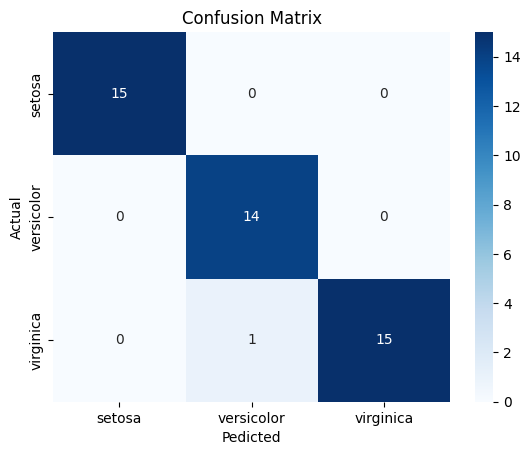

In [ ]:
# 7. Evaluate the Model
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")
print("Classififcation report:\n", classification_report(y_pred, y_test, target_names=le.classes_))

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Pedicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 8. Prune the Tree
dt_pruned = DecisionTreeClassifier(random_state=42, max_depth=2)
dt_pruned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)